<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [9]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [10]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


Compensation Statistics:
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


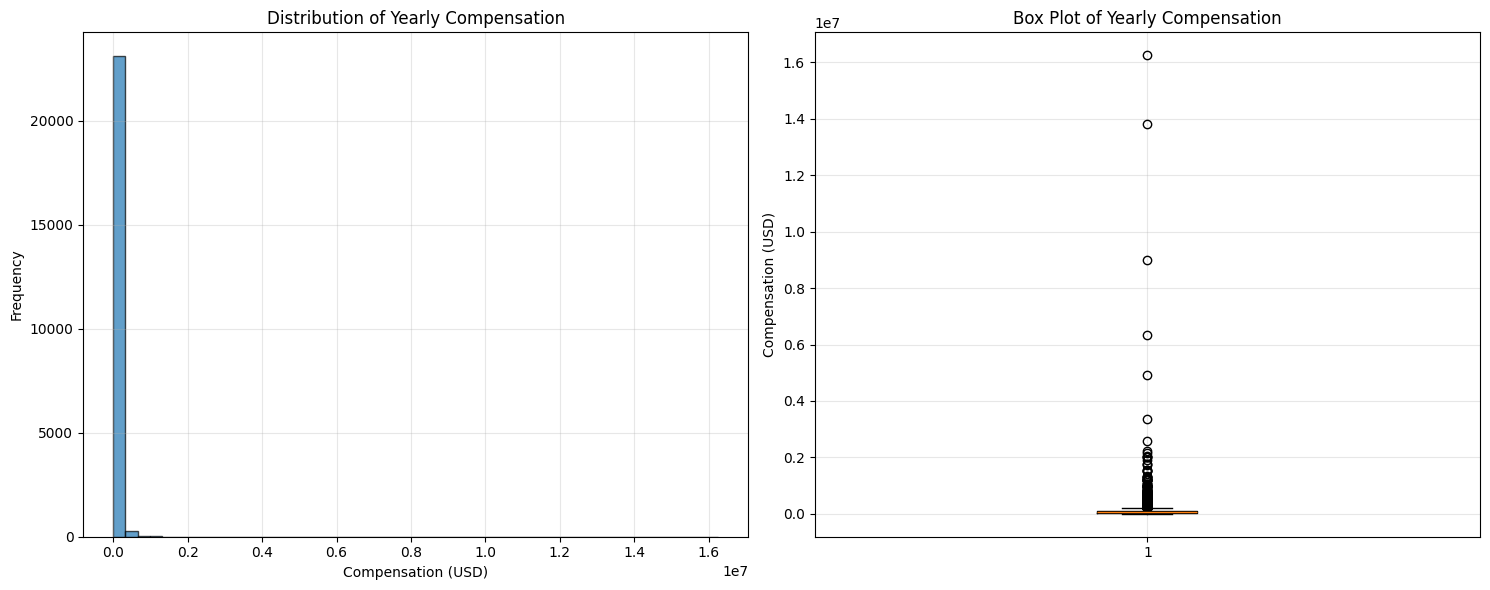

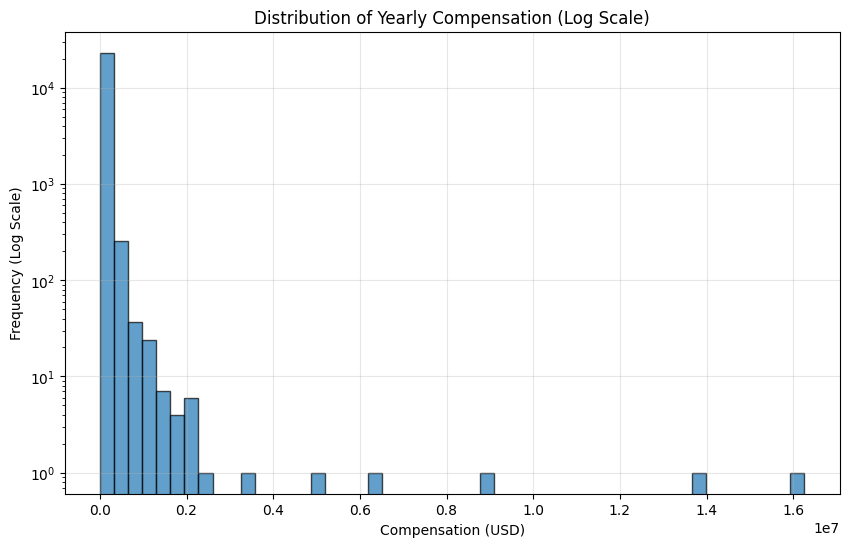

In [11]:
# Check if ConvertedCompYearly column exists
if 'ConvertedCompYearly' in df.columns:
    # Basic statistics
    comp_stats = df['ConvertedCompYearly'].describe()
    print("Compensation Statistics:")
    print(comp_stats)

    # Create subplots for distribution visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Histogram
    ax1.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    ax1.set_title('Distribution of Yearly Compensation')
    ax1.set_xlabel('Compensation (USD)')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)

    # Box plot
    ax2.boxplot(df['ConvertedCompYearly'].dropna())
    ax2.set_title('Box Plot of Yearly Compensation')
    ax2.set_ylabel('Compensation (USD)')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Log-scale histogram for better visualization
    plt.figure(figsize=(10, 6))
    plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black', alpha=0.7, log=True)
    plt.title('Distribution of Yearly Compensation (Log Scale)')
    plt.xlabel('Compensation (USD)')
    plt.ylabel('Frequency (Log Scale)')
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("ConvertedCompYearly column not found")
    # Check for alternative compensation columns
    comp_columns = [col for col in df.columns if 'comp' in col.lower() or 'salary' in col.lower()]
    print("Available compensation-related columns:", comp_columns)

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


Number of full-time employees: 52717
Median compensation for full-time employees: $66,151.00
Mean compensation for full-time employees: $86,076.23
Overall median compensation: $65,000.00
Difference: $1,151.00


/tmp/ipython-input-1219847937.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(compensation_data, labels=['All Respondents', 'Full-time Employees'], showfliers=False)


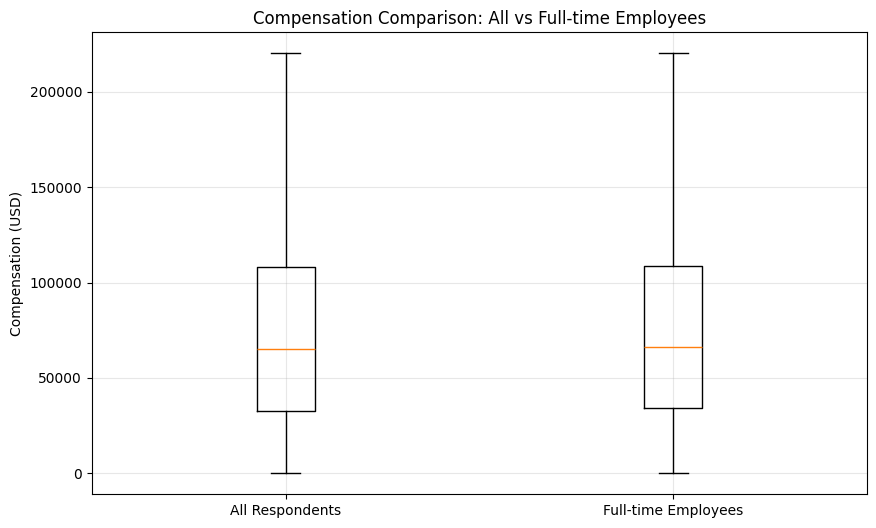

In [12]:
# Check if Employment column exists
if 'Employment' in df.columns and 'ConvertedCompYearly' in df.columns:
    # Filter for full-time employees
    full_time_mask = df['Employment'].str.contains('full-time', case=False, na=False)
    full_time_df = df[full_time_mask]

    print(f"Number of full-time employees: {len(full_time_df)}")

    # Calculate median compensation
    median_comp_full_time = full_time_df['ConvertedCompYearly'].median()
    mean_comp_full_time = full_time_df['ConvertedCompYearly'].mean()

    print(f"Median compensation for full-time employees: ${median_comp_full_time:,.2f}")
    print(f"Mean compensation for full-time employees: ${mean_comp_full_time:,.2f}")

    # Compare with overall median
    overall_median = df['ConvertedCompYearly'].median()
    print(f"Overall median compensation: ${overall_median:,.2f}")
    print(f"Difference: ${median_comp_full_time - overall_median:,.2f}")

    # Visualize comparison
    plt.figure(figsize=(10, 6))
    compensation_data = [df['ConvertedCompYearly'].dropna(), full_time_df['ConvertedCompYearly'].dropna()]
    plt.boxplot(compensation_data, labels=['All Respondents', 'Full-time Employees'], showfliers=False)
    plt.title('Compensation Comparison: All vs Full-time Employees')
    plt.ylabel('Compensation (USD)')
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("Required columns not found for this analysis")

<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



<Figure size 1400x800 with 0 Axes>

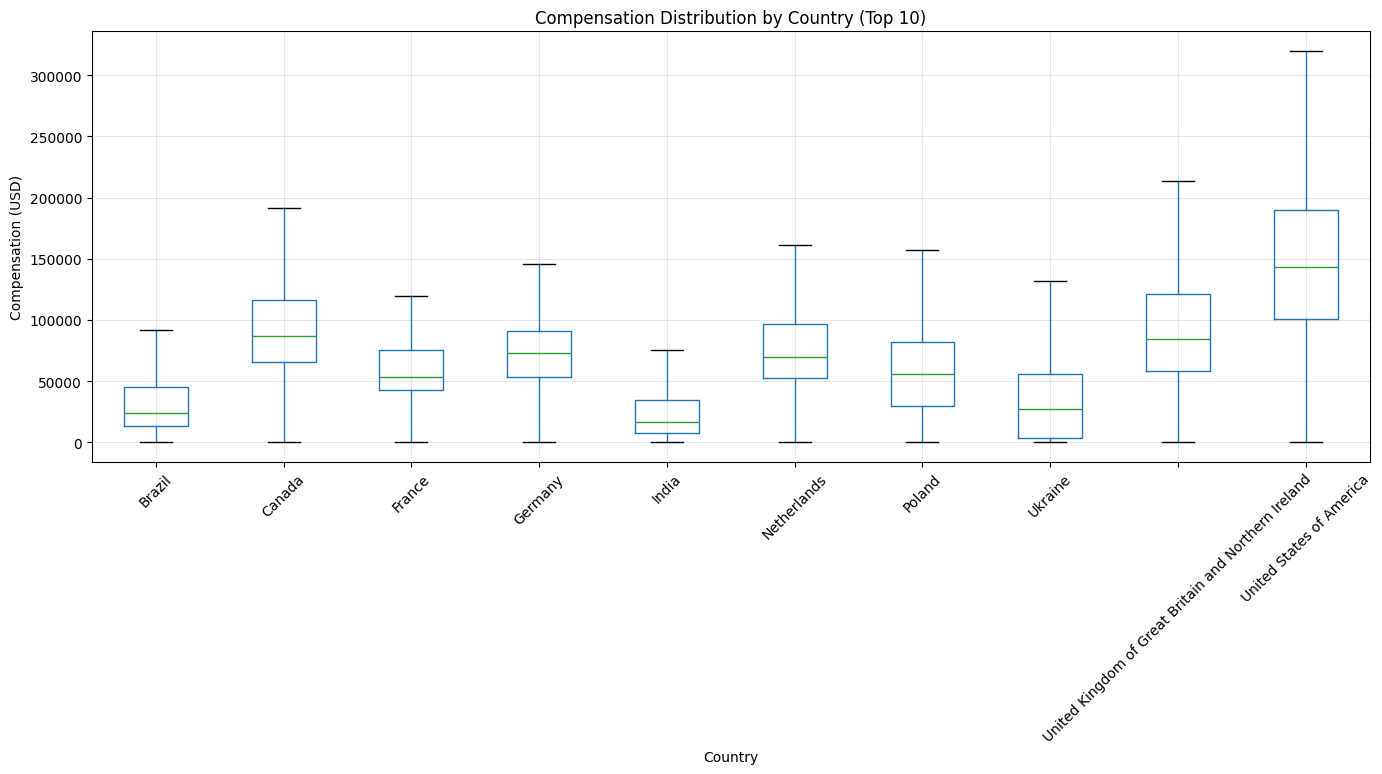

Median Compensation by Country:
United States of America: $143,000.00
Canada: $87,231.00
United Kingdom of Great Britain and Northern Ireland: $84,076.00
Germany: $73,036.00
Netherlands: $69,814.00
Poland: $55,535.50
France: $53,703.00
Ukraine: $26,903.50
Brazil: $23,945.00
India: $16,749.00


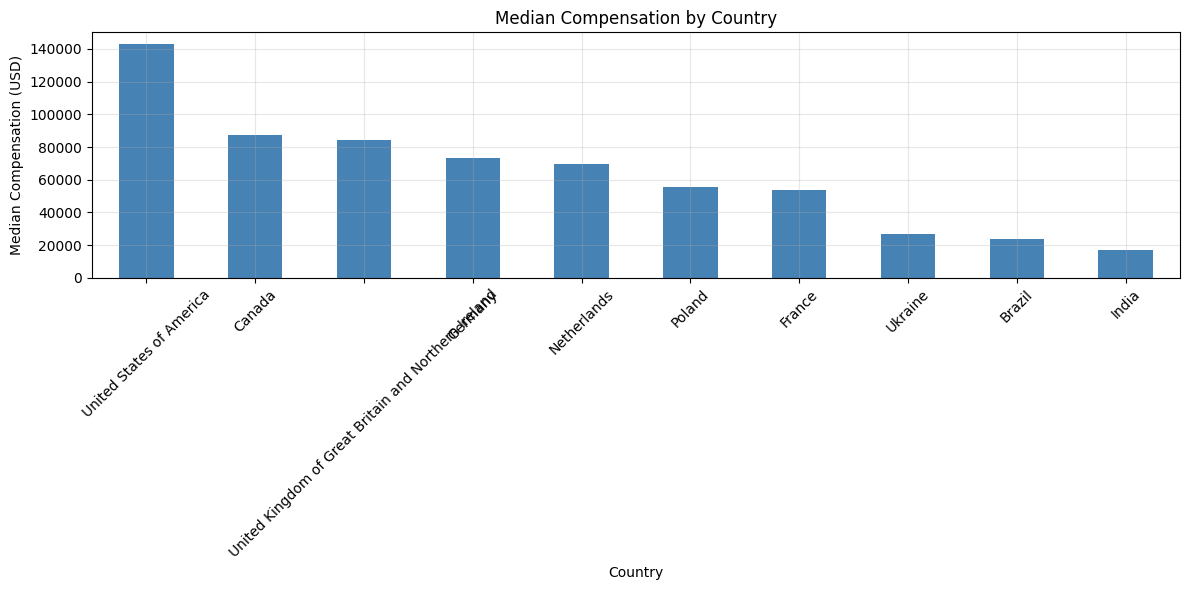

In [13]:
if 'Country' in df.columns and 'ConvertedCompYearly' in df.columns:
    # Get top countries by number of respondents
    top_countries = df['Country'].value_counts().head(10).index

    # Filter data for top countries
    country_comp_data = df[df['Country'].isin(top_countries)]

    # Create box plot
    plt.figure(figsize=(14, 8))
    country_comp_data.boxplot(column='ConvertedCompYearly', by='Country',
                             rot=45, figsize=(14, 8), showfliers=False)
    plt.title('Compensation Distribution by Country (Top 10)')
    plt.suptitle('')  # Remove automatic subtitle
    plt.xlabel('Country')
    plt.ylabel('Compensation (USD)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Calculate median compensation by country
    median_by_country = country_comp_data.groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False)

    print("Median Compensation by Country:")
    for country, median_comp in median_by_country.items():
        print(f"{country}: ${median_comp:,.2f}")

    # Bar chart of median compensation by country
    plt.figure(figsize=(12, 6))
    median_by_country.plot(kind='bar', color='steelblue')
    plt.title('Median Compensation by Country')
    plt.xlabel('Country')
    plt.ylabel('Median Compensation (USD)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("Country or ConvertedCompYearly column not found")

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


IQR bounds: Lower = $-80,177.25, Upper = $220,860.75
Original dataset size: 65437
Cleaned dataset size: 22457
Outliers removed: 42980
Percentage of data kept: 34.32%

Before outlier removal:
Mean: $86,155.29
Median: $65,000.00
Std: $186,756.97

After outlier removal:
Mean: $71,347.20
Median: $63,694.00
Std: $51,271.40


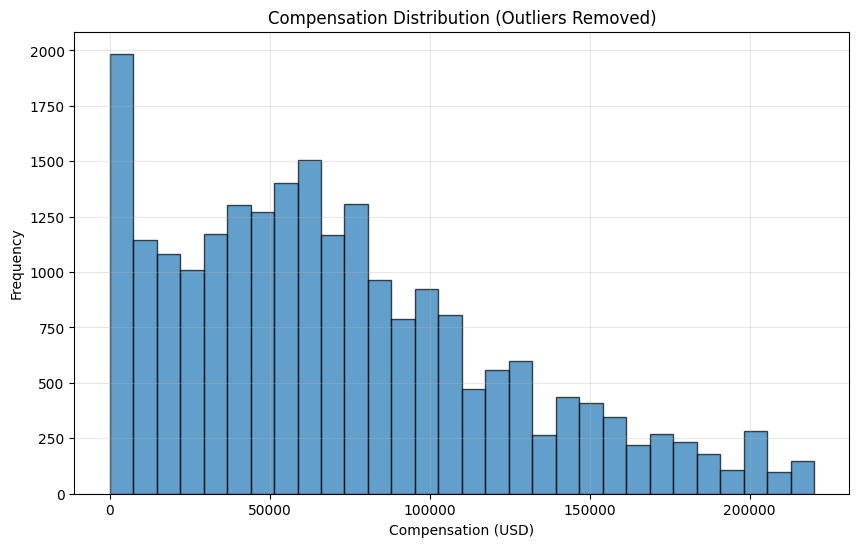

In [14]:
if 'ConvertedCompYearly' in df.columns:
    # Calculate IQR for outlier removal
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"IQR bounds: Lower = ${lower_bound:,.2f}, Upper = ${upper_bound:,.2f}")

    # Remove outliers
    df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

    print(f"Original dataset size: {len(df)}")
    print(f"Cleaned dataset size: {len(df_clean)}")
    print(f"Outliers removed: {len(df) - len(df_clean)}")
    print(f"Percentage of data kept: {(len(df_clean) / len(df)) * 100:.2f}%")

    # Compare statistics
    print("\nBefore outlier removal:")
    print(f"Mean: ${df['ConvertedCompYearly'].mean():,.2f}")
    print(f"Median: ${df['ConvertedCompYearly'].median():,.2f}")
    print(f"Std: ${df['ConvertedCompYearly'].std():,.2f}")

    print("\nAfter outlier removal:")
    print(f"Mean: ${df_clean['ConvertedCompYearly'].mean():,.2f}")
    print(f"Median: ${df_clean['ConvertedCompYearly'].median():,.2f}")
    print(f"Std: ${df_clean['ConvertedCompYearly'].std():,.2f}")

    # Visualize cleaned distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df_clean['ConvertedCompYearly'].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title('Compensation Distribution (Outliers Removed)')
    plt.xlabel('Compensation (USD)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

else:
    print("ConvertedCompYearly column not found")
    df_clean = df.copy()

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


/tmp/ipython-input-2880284310.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[work_exp_col] = pd.to_numeric(df_clean[work_exp_col], errors='coerce')


Correlation Matrix:
                     ConvertedCompYearly  YearsCodePro  JobSatPoints_1
ConvertedCompYearly             1.000000      0.387209       -0.058170
YearsCodePro                    0.387209      1.000000       -0.037566
JobSatPoints_1                 -0.058170     -0.037566        1.000000


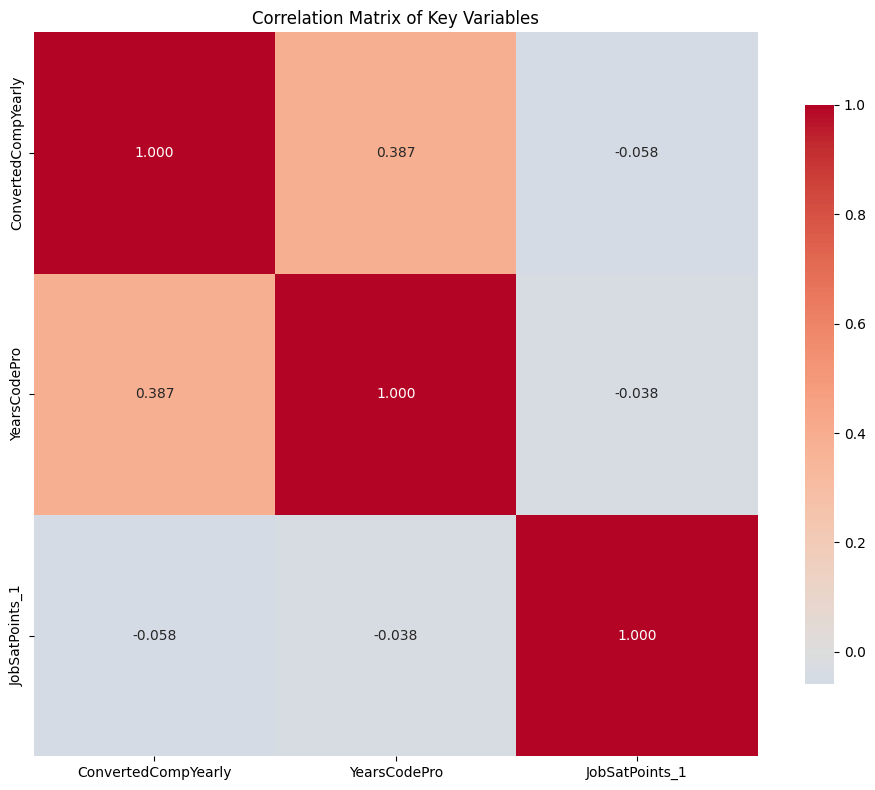


Correlation Interpretation:
ConvertedCompYearly vs YearsCodePro: moderate positive correlation (0.387)
ConvertedCompYearly vs JobSatPoints_1: weak negative correlation (-0.058)
YearsCodePro vs JobSatPoints_1: weak negative correlation (-0.038)


In [15]:
# Prepare numerical columns for correlation analysis
numerical_columns = []

# Check for key columns and prepare them
if 'ConvertedCompYearly' in df_clean.columns:
    numerical_columns.append('ConvertedCompYearly')

# Check for work experience column
work_exp_col = None
for col in df_clean.columns:
    if 'workexp' in col.lower() or 'yearscodepro' in col.lower():
        work_exp_col = col
        break

if work_exp_col:
    # Convert to numeric if needed
    if df_clean[work_exp_col].dtype == 'object':
        df_clean[work_exp_col] = pd.to_numeric(df_clean[work_exp_col], errors='coerce')
    numerical_columns.append(work_exp_col)

# Check for job satisfaction column
job_sat_col = None
for col in df_clean.columns:
    if 'jobsat' in col.lower() and 'point' in col.lower():
        job_sat_col = col
        break

if job_sat_col and job_sat_col in df_clean.columns:
    numerical_columns.append(job_sat_col)

# Calculate correlations
if len(numerical_columns) >= 2:
    correlation_matrix = df_clean[numerical_columns].corr()

    print("Correlation Matrix:")
    print(correlation_matrix)

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
                center=0, square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Matrix of Key Variables')
    plt.tight_layout()
    plt.show()

    # Print interpretation
    print("\nCorrelation Interpretation:")
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            corr = correlation_matrix.iloc[i, j]
            strength = "weak"
            if abs(corr) > 0.7:
                strength = "strong"
            elif abs(corr) > 0.3:
                strength = "moderate"

            direction = "positive" if corr > 0 else "negative"

            print(f"{numerical_columns[i]} vs {numerical_columns[j]}: {strength} {direction} correlation ({corr:.3f})")

else:
    print("Not enough numerical columns for correlation analysis")
    print("Available numerical columns:", df_clean.select_dtypes(include=[np.number]).columns.tolist())

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


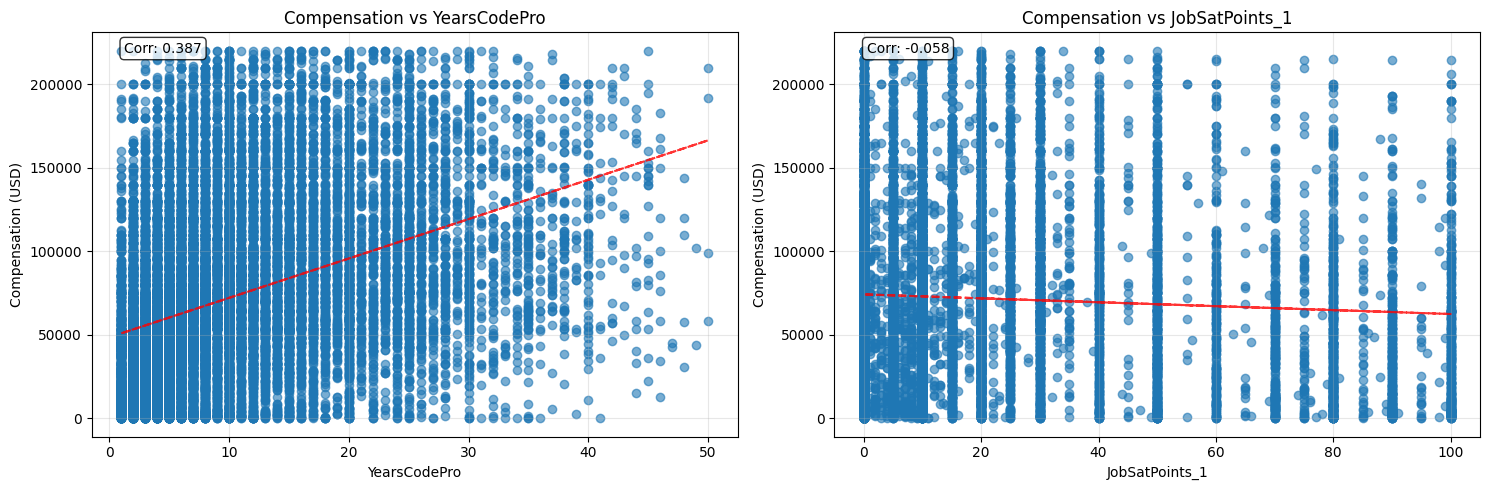

In [17]:
import numpy as np

# Create scatter plots for key correlations
if 'ConvertedCompYearly' in df_clean.columns and len(numerical_columns) > 1:
    fig, axes = plt.subplots(1, len(numerical_columns)-1, figsize=(15, 5))

    if len(numerical_columns)-1 == 1:
        axes = [axes]  # Make it iterable

    for i, col in enumerate(numerical_columns[1:], 0):
        # Filter out NaN values
        plot_data = df_clean[['ConvertedCompYearly', col]].dropna()

        axes[i].scatter(plot_data[col], plot_data['ConvertedCompYearly'], alpha=0.6)
        axes[i].set_title(f'Compensation vs {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Compensation (USD)')
        axes[i].grid(True, alpha=0.3)

        # Add trend line
        if len(plot_data) > 1:
            z = np.polyfit(plot_data[col], plot_data['ConvertedCompYearly'], 1)
            p = np.poly1d(z)
            axes[i].plot(plot_data[col], p(plot_data[col]), "r--", alpha=0.8)

            # Calculate and display correlation
            correlation = plot_data['ConvertedCompYearly'].corr(plot_data[col])
            axes[i].text(0.05, 0.95, f'Corr: {correlation:.3f}',
                        transform=axes[i].transAxes,
                        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

else:
    print("Not enough data for scatter plots")

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
